In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns


In [41]:
# import csv file
df = pd.read_csv('C:/Users/Paresh/OneDrive - Digital Prudentia/Documents/Diwali sales.csv', encoding='latin-1')


In [42]:
df.shape

(11251, 15)

In [43]:
df.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [45]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)


In [46]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [47]:
# drop null values
df.dropna(inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [49]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [50]:
df['Amount'].dtypes

dtype('int32')

In [51]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [52]:
# use describe() for specific columns 
df[['Age', 'Orders', 'Amount']].describe() #df.describe()for all columns

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


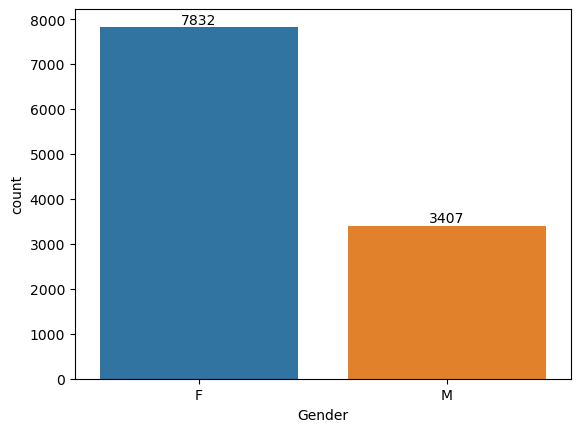

In [53]:
#EDA
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:  # To Show count
    ax.bar_label(bars)

In [54]:
*From above graphs we can conclude that most of the buyers are females*



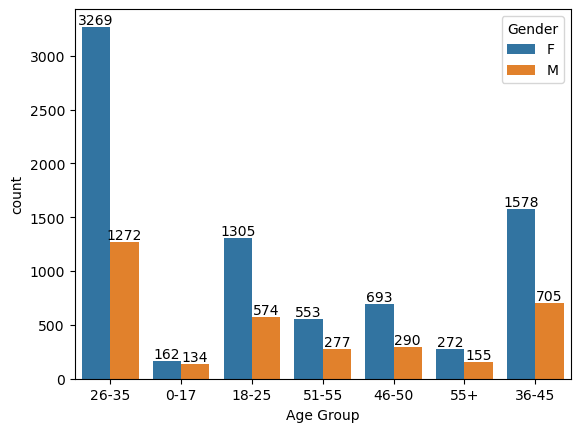

In [55]:
# plotting a bar chart for age and it's count

ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender') #using hue function to show gender category in plot

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

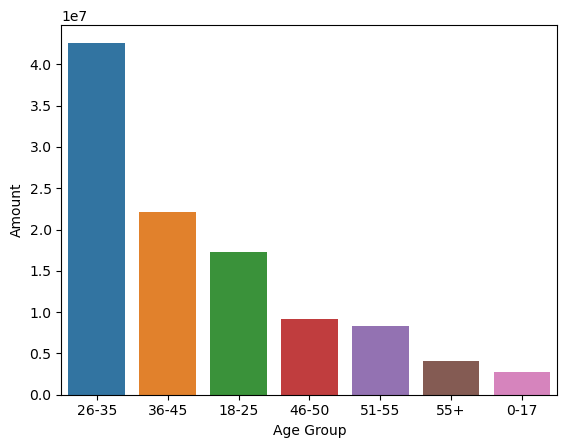

In [56]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

In [57]:
*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

<Axes: xlabel='State', ylabel='Orders'>

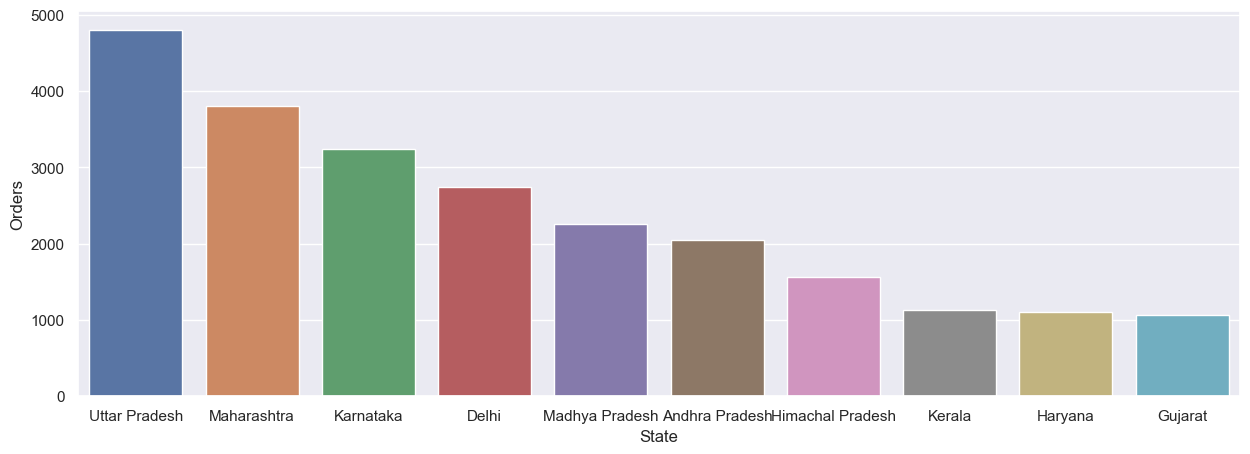

In [59]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})   #to adjust width 
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

In [60]:
*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


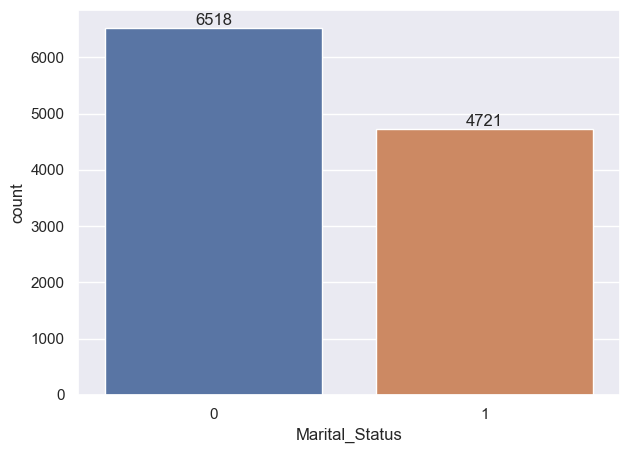

In [62]:
## plotting a bar chart for Marital status and it's count
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(2,5)})
for bars in ax.containers:
    ax.bar_label(bars)

In [63]:
*From above graphs we can see that most of the buyers are married*

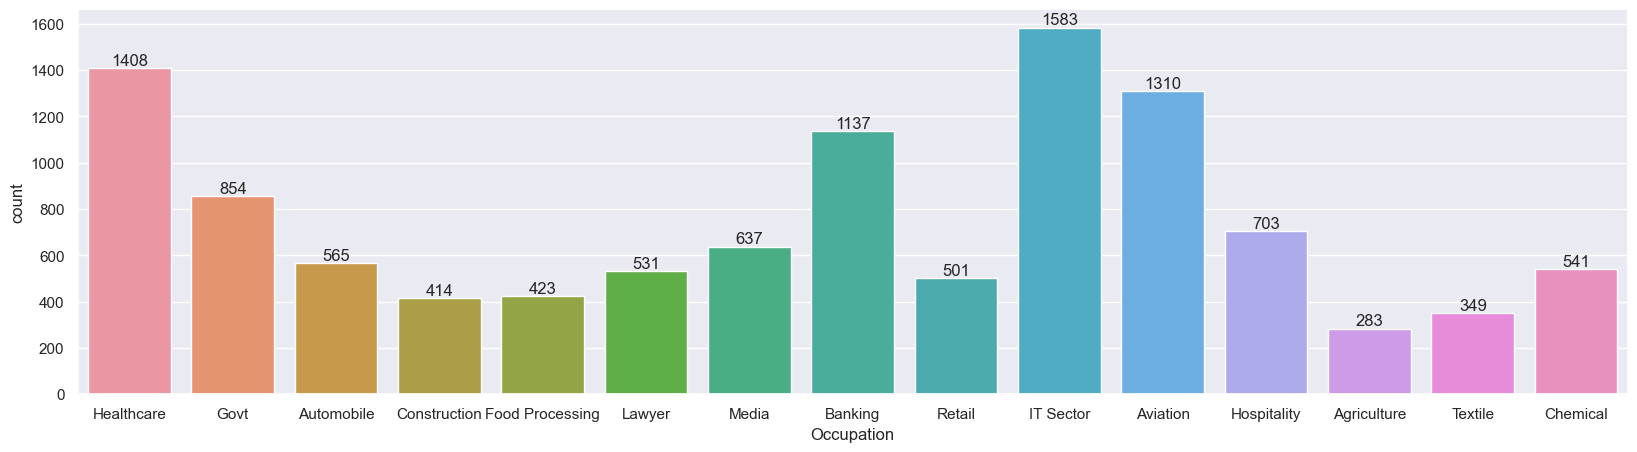

In [64]:
# plotting a bar chart for Occupation and it's count
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

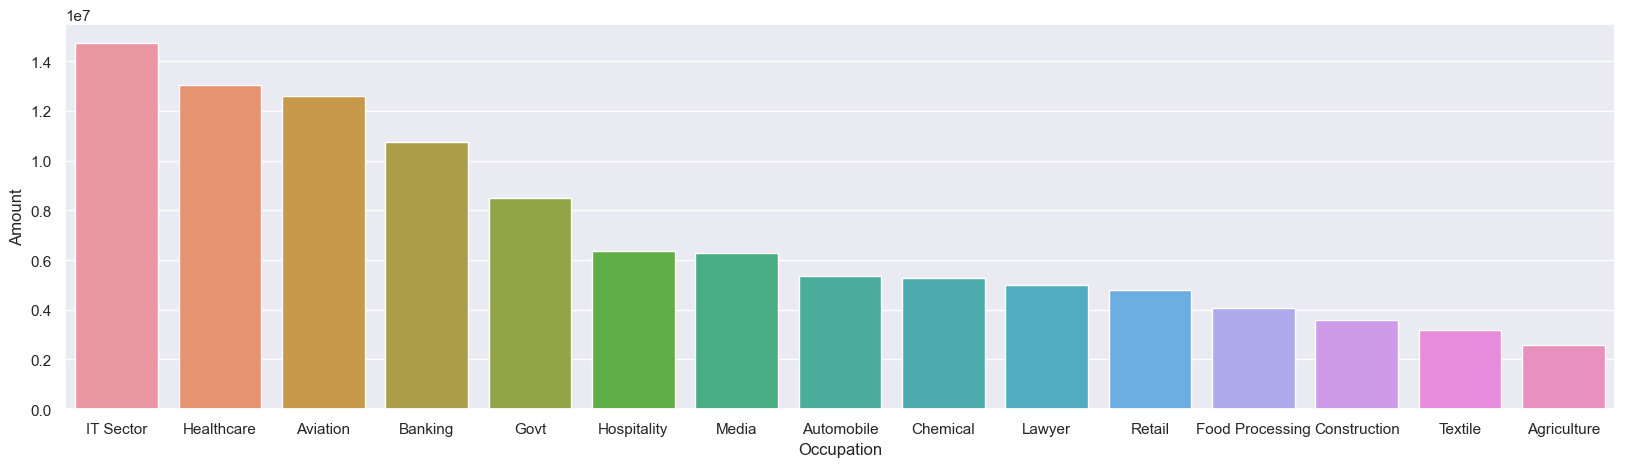

In [68]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')



In [69]:
*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

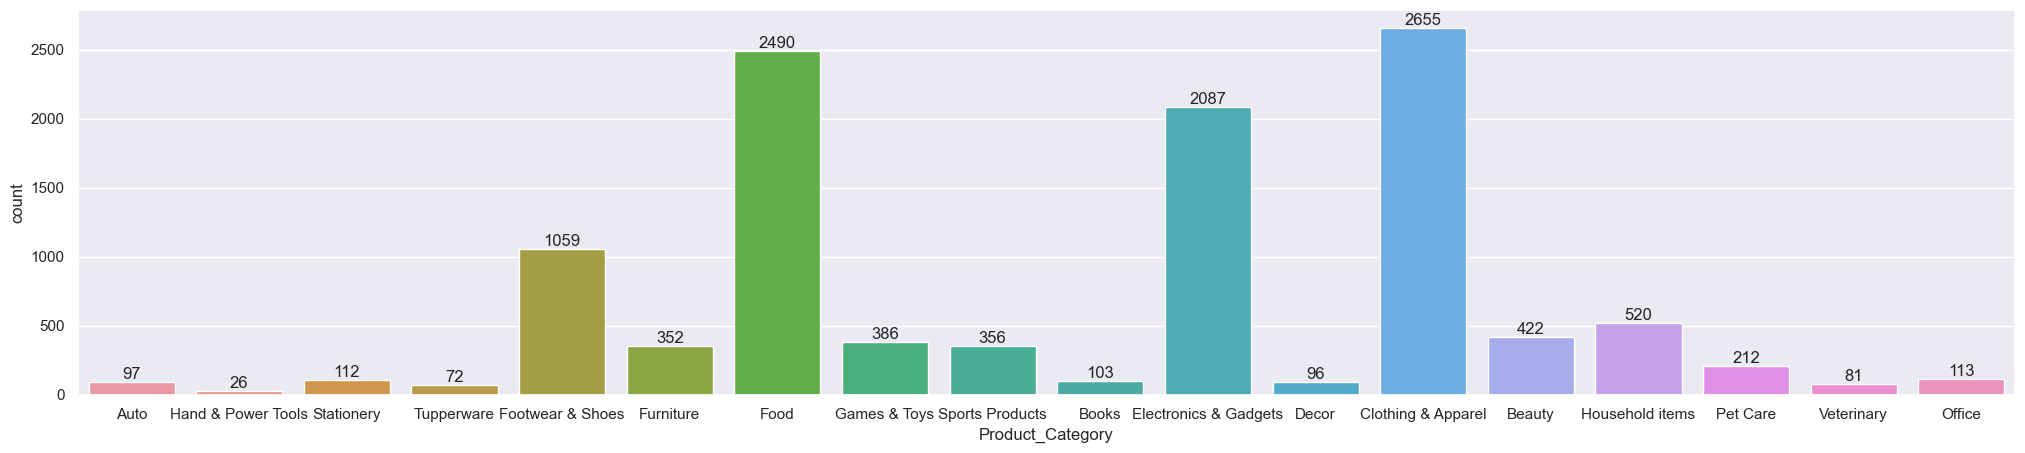

In [74]:
# plotting a bar chart for product category and it's count
sns.set(rc={'figure.figsize':(25,5)})
ax = sns.countplot(data = df, x = 'Product_Category')


for bars in ax.containers:
    ax.bar_label(bars)

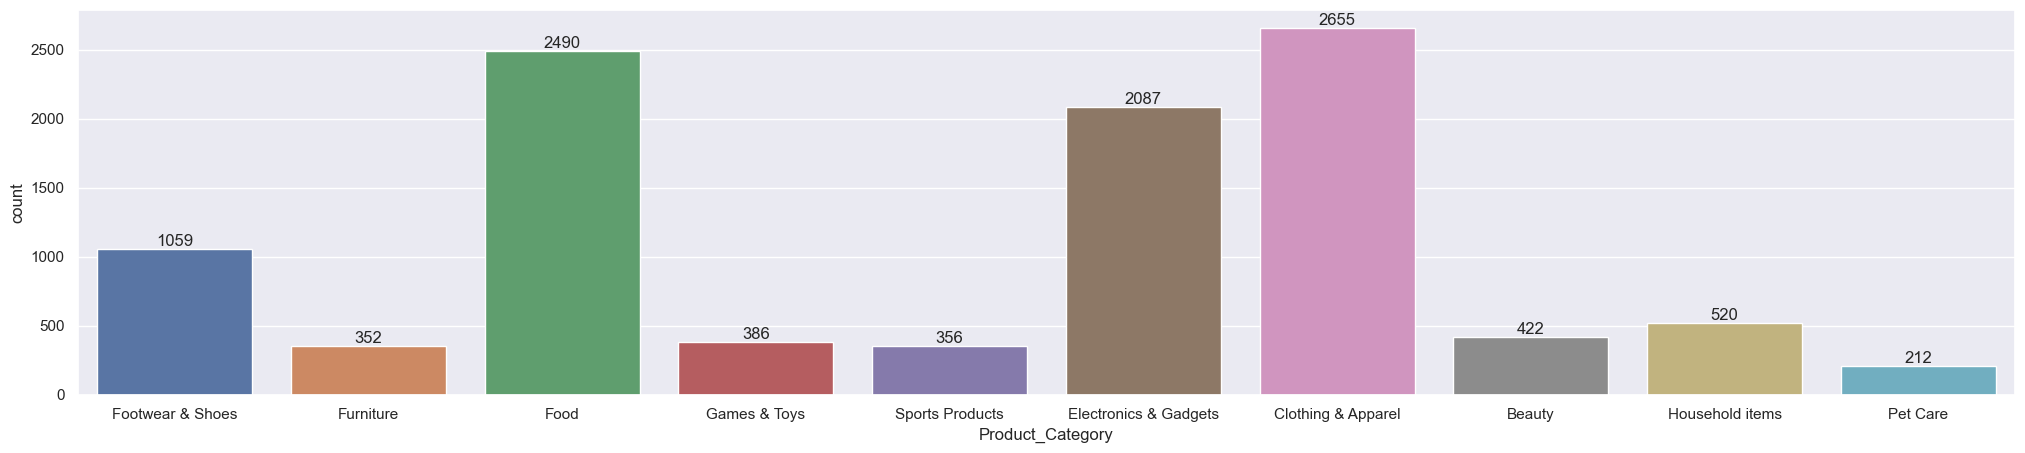

In [75]:

# Get the top 10 product counts
top_10_products = df['Product_Category'].value_counts().nlargest(10)

sns.set(rc={'figure.figsize':(25, 5)})
ax = sns.countplot(data=df[df['Product_Category'].isin(top_10_products.index)], x='Product_Category')

# Display the counts on top of each bar
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()


<Axes: xlabel='Product_Category', ylabel='Amount'>

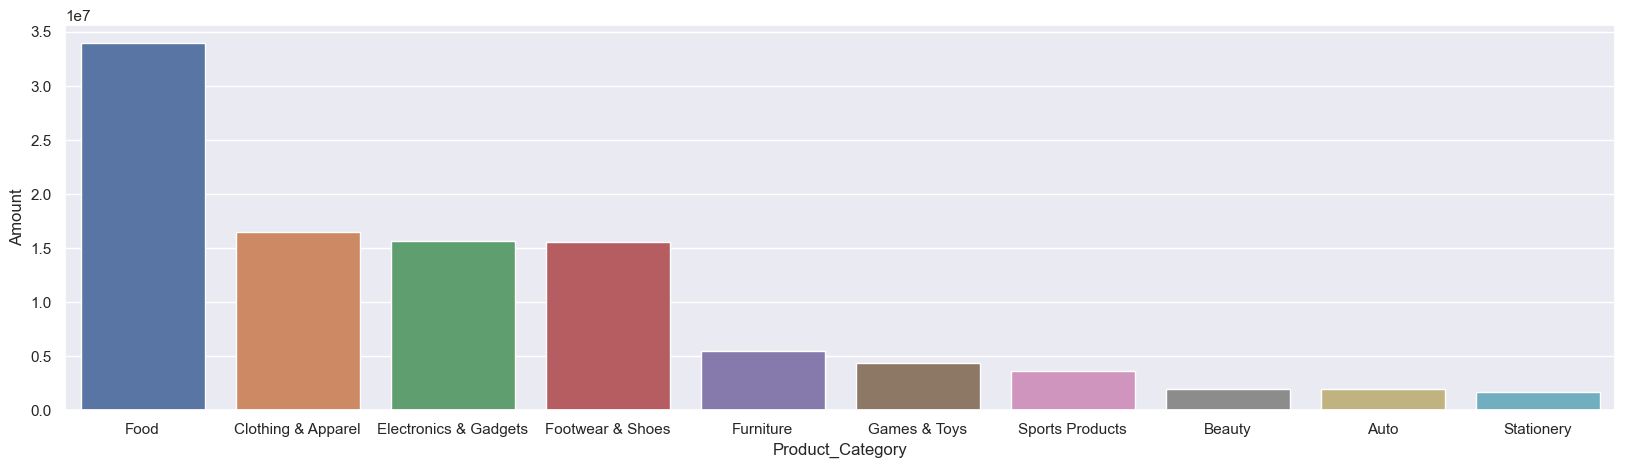

In [76]:
#Top 10 product category by amount
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

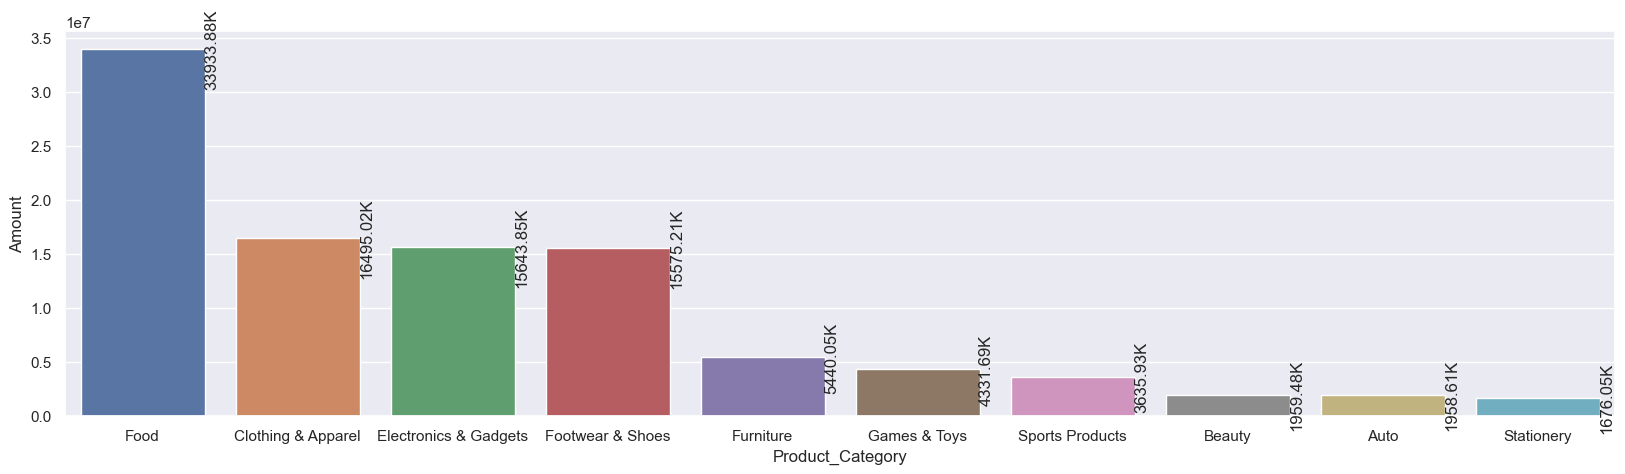

In [78]:

sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

# Convert the amount values to a more readable format
sales_state['Amount_readable'] = sales_state['Amount'] / 1000  # Convert to thousands (K)
sales_state['Amount_readable'] = sales_state['Amount_readable'].apply(lambda x: f'{x:.2f}K')

sns.set(rc={'figure.figsize': (20, 5)})
ax = sns.barplot(data=sales_state, x='Product_Category', y='Amount')

# Display the converted amount values as annotations beside the bars
for i, p in enumerate(ax.patches):
    ax.annotate(sales_state['Amount_readable'].values[i], (p.get_x() + p.get_width(), p.get_height()),
                ha='center', va='center', xytext=(5, 0), textcoords='offset points', rotation=90)

plt.show()


In [ ]:
*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*
*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*